In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#Define positive and negative values
pos_point=np.array([(-2,3),(0,1),(2,-1)])
neg_point=np.array([(-2,1),(0,-1),(2,-3)])

In [3]:
pos_point

array([[-2,  3],
       [ 0,  1],
       [ 2, -1]])

In [4]:
neg_point

array([[-2,  1],
       [ 0, -1],
       [ 2, -3]])

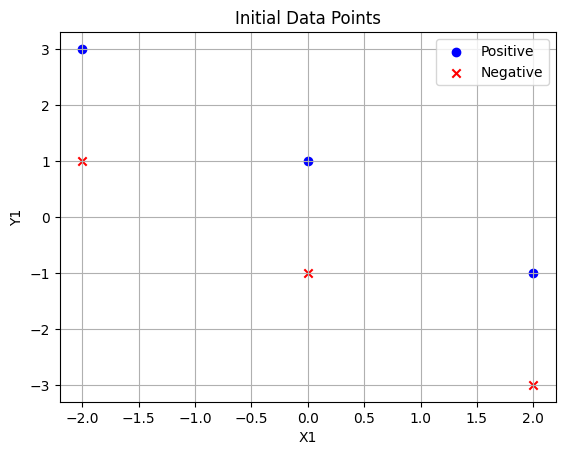

In [5]:
#Plot initial data points
plt.scatter(pos_point[:,0],pos_point[:,1],color='blue',marker='o',label='Positive')
plt.scatter(neg_point[:,0],neg_point[:,1],color='red',marker='x',label='Negative')
plt.legend(loc='best')
plt.xlabel('X1')
plt.ylabel('Y1')
plt.title('Initial Data Points')
plt.grid(True)
plt.show()

In [6]:
#combine positive and negative points
X=np.vstack((pos_point,neg_point))
y=np.array(([1]*len(pos_point)+[-1]*len(neg_point)))

In [7]:
X

array([[-2,  3],
       [ 0,  1],
       [ 2, -1],
       [-2,  1],
       [ 0, -1],
       [ 2, -3]])

In [8]:
y

array([ 1,  1,  1, -1, -1, -1])

In [14]:
#Perceptron algorithm
def perceptron(X, y, steps=10) :
    theta = np.zeros(X.shape[1])
    theta0 = 0 
    for t in range (steps):
        for i, xi in enumerate(X):
            if y[i] * (np.dot(theta, xi) + theta0) <= 0:
                theta += y[i] * xi
                theta0 += y[i]
                break 
        
        ##plot after each iteration
        plot_desicion_boundary(theta, theta0, t+1)
    return theta, theta0

def plot_desicion_boundary(theta, theta0, iteration):
    plt.figure(figsize=(8, 6))
    plt.scatter(pos_point[:,0],pos_point[:,1],color='blue',marker='o',label='Positive class')
    plt.scatter(neg_point[:,0],neg_point[:,1],color='red',marker='x',label='Negative class')

    ##Plot decision boundary
    x_vals = np.linspace(-3, 3, 2)
    #Check for the case when theta[1] is 0 to avoid division by zero
    if theta[1] != 0:
        y_vals = -(theta[0] * x_vals + theta0) / theta[1]
        plt.plot(x_vals, y_vals, label=f'Step {iteration}')   
    else:
        #PLot vertical line if theta[1] is 0
        x_vals = -theta0 / theta[0]
        plt.axvline(x=x_vals, color='green', linestyle='--', label=f'Step {iteration}')
    plt.xlabel('X1')
    plt.ylabel('Y1')
    plt.title('Decision Boundary')
    plt.grid(True)
    plt.show()
        

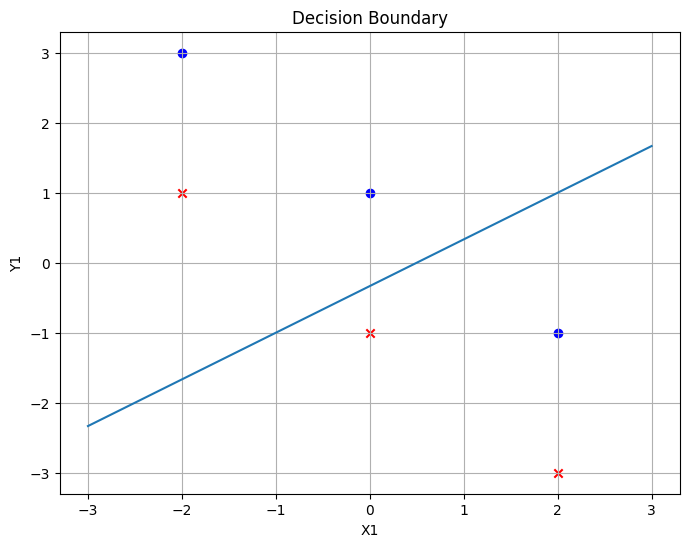

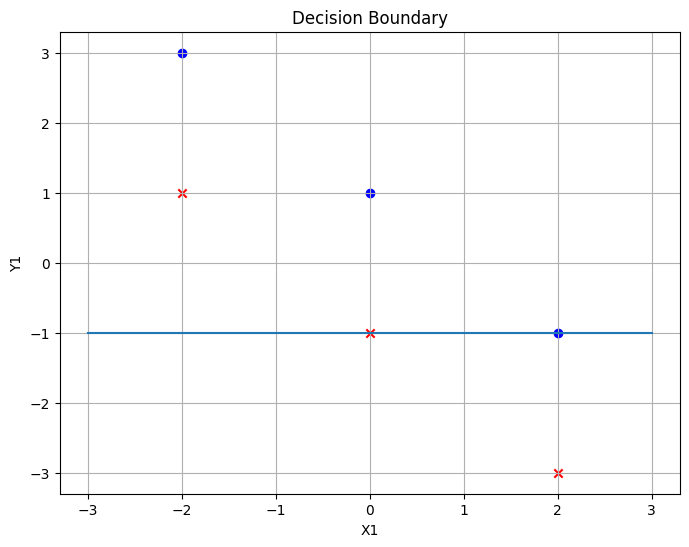

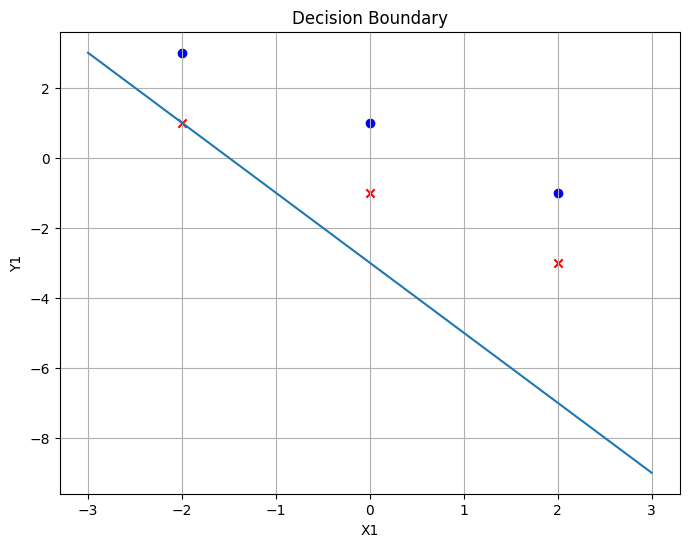

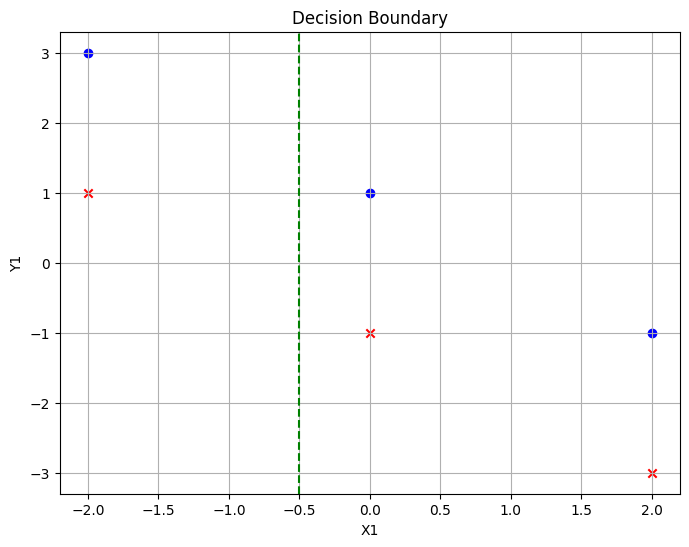

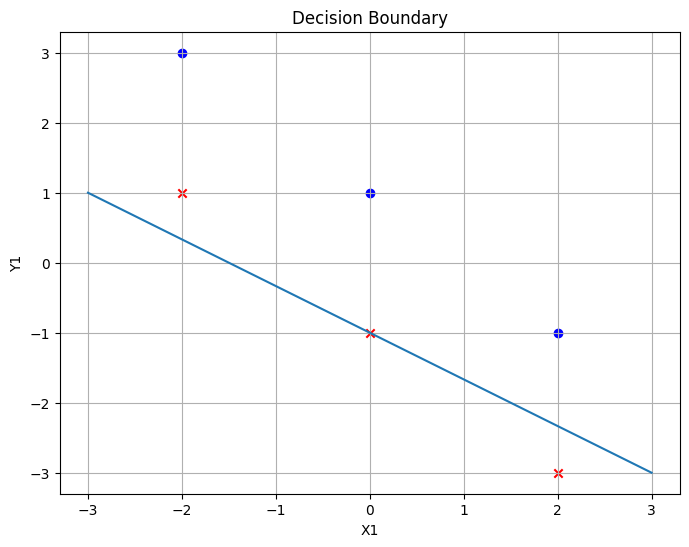

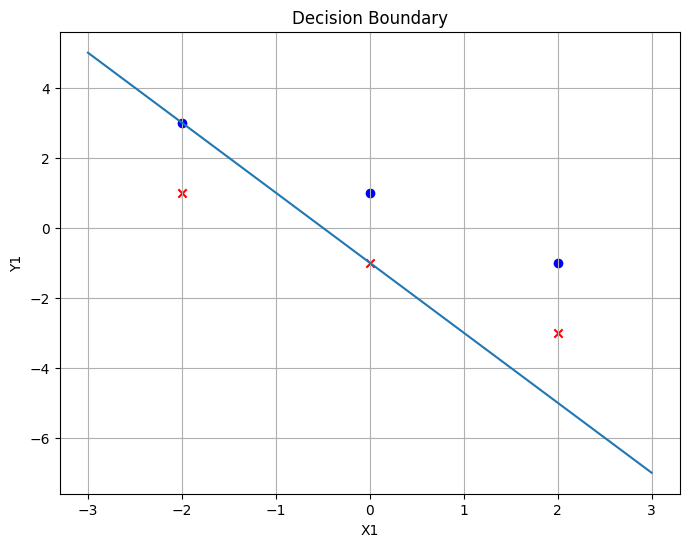

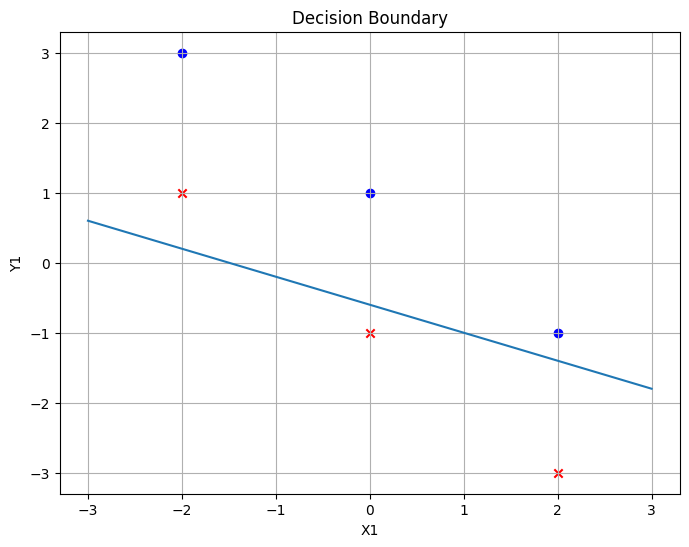

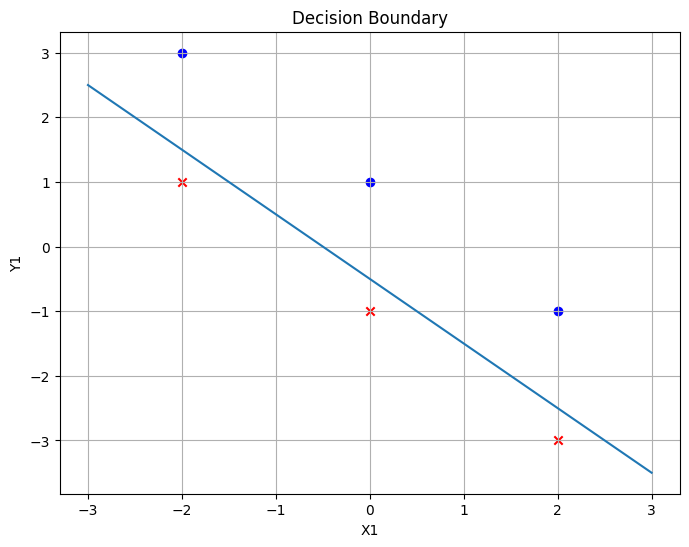

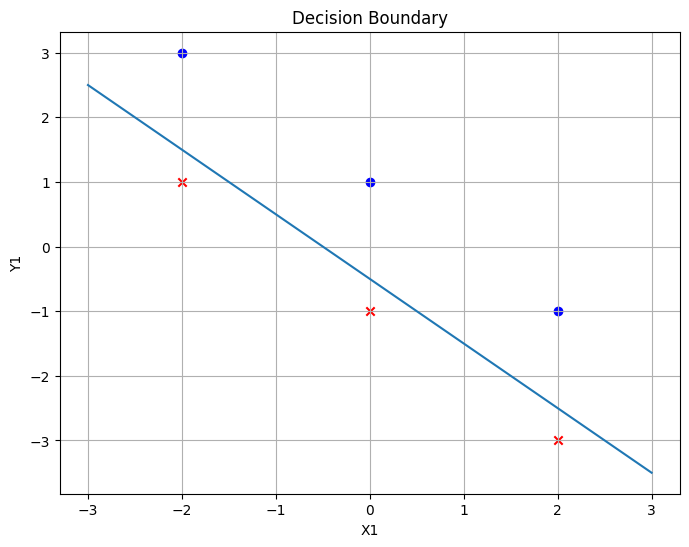

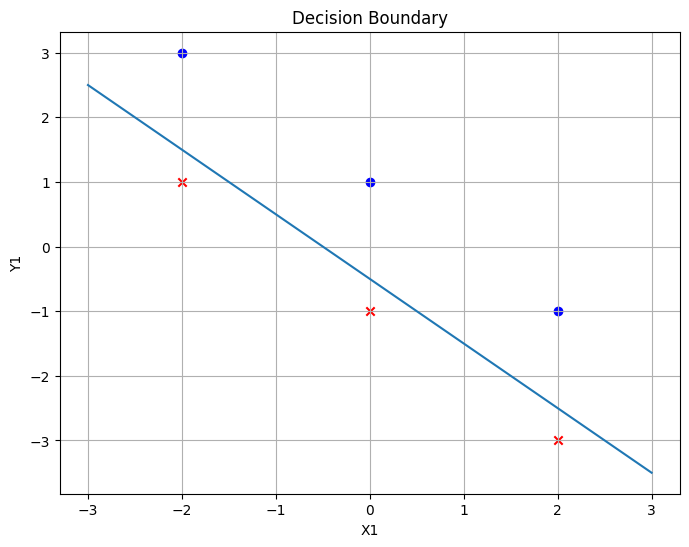

In [15]:
theta_final, theta0_final = perceptron(X, y, 10)